In [144]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [13]:
df = pd.read_csv('../inputs/ready_data/preprocessed_all_matches.csv', parse_dates=['Date'])
df.dropna(subset=['HomeTeam', 'AwayTeam'], inplace=True)
df = df[['Full_Time_Result', 'Home Overall Score', 'Home Attack Score', 'Home Middle Score', 'Home Defensive Score', 'Home Budget',
        'Away Overall Score', 'Away Attack Score', 'Away Middle Score', 'Away Defensive Score', 'Away Budget', 'Difference_Overall_Score',
        'Difference_Attack_Score', 'Difference_Middle_Score', 'Difference_Defensive_Score', 'Difference_Budget', 'HOME_TRUESKILL_MU_NO_RESET',
        'AWAY_TRUESKILL_MU_NO_RESET','HOME_TRUESKILL_SIGMA_NO_RESET', 'AWAY_TRUESKILL_SIGMA_NO_RESET','DRAW_CHANCE_NO_RESET',
        'HOME_TRUESKILL_MU_SEASON', 'AWAY_TRUESKILL_MU_SEASON', 'HOME_TRUESKILL_SIGMA_SEASON', 'AWAY_TRUESKILL_SIGMA_SEASON',
        'DRAW_CHANCE_SEASON', 'HOME_ID', 'AWAY_ID',
        'HOME_WINS_HOME', 'HOME_DRAWS_HOME', 'HOME_LOSSES_HOME', 'AWAY_WINS_HOME', 'AWAY_DRAWS_HOME', 'AWAY_LOSSES_HOME', 'HOME_WINS_AWAY', 'HOME_DRAWS_AWAY', 
        'HOME_LOSSES_AWAY', 'AWAY_WINS_AWAY', 'AWAY_DRAWS_AWAY', 'AWAY_LOSSES_AWAY']]

In [14]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

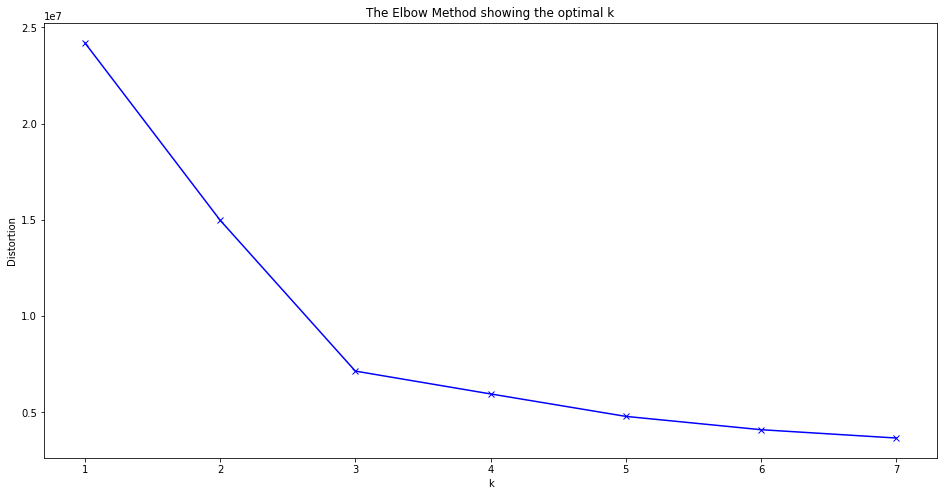

In [15]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
X = df.drop(['Full_Time_Result'], axis=1)
y = df.Full_Time_Result

kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(X)
kmeanModel.labels_
len(kmeanModel.labels_)

5210

In [17]:
df['Cluster'] = kmeanModel.labels_
df

,Full_Time_Result,Home Overall Score,Home Attack Score,Home Middle Score,Home Defensive Score,Home Budget,Away Overall Score,Away Attack Score,Away Middle Score,Away Defensive Score,...,AWAY_WINS_HOME,AWAY_DRAWS_HOME,AWAY_LOSSES_HOME,HOME_WINS_AWAY,HOME_DRAWS_AWAY,HOME_LOSSES_AWAY,AWAY_WINS_AWAY,AWAY_DRAWS_AWAY,AWAY_LOSSES_AWAY,Cluster
0,1,81,83,80,78,25.0,76,76,74,73,...,0,0,0,0,0,0,0,0,0,3
1,0,76,75,74,73,1.0,72,72,72,70,...,0,0,0,0,0,0,0,0,0,9
2,2,76,78,74,72,15.0,72,75,70,68,...,0,0,0,0,0,0,0,0,0,3
3,1,75,72,75,75,8.0,76,78,77,72,...,0,0,0,0,0,0,0,0,0,9
4,2,78,80,76,73,7.5,74,74,74,74,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,2,74,76,74,73,4.4,77,78,78,76,...,7,3,3,3,4,7,1,7,5,0
5206,0,76,76,76,73,3.1,79,79,79,79,...,8,2,3,3,0,11,3,2,8,8
5207,2,77,77,77,76,8.2,75,76,75,75,...,4,3,7,5,1,8,0,5,7,9
5208,1,79,80,79,78,32.9,75,75,75,75,...,9,4,0,1,6,6,7,4,2,3


In [18]:
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, shuffle=False)
model = SVC()   
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5302325581395348

In [19]:
df.Cluster.unique()

array([3, 9, 1, 5, 8, 6, 0, 2, 4, 7], dtype=int32)

In [20]:
df.groupby('Cluster').Full_Time_Result.value_counts()

Cluster  Full_Time_Result
0        1                   419
         2                   287
         0                   260
1        1                   300
         0                    27
         2                    14
2        2                    20
         0                    19
         1                    19
3        1                   474
         0                   153
         2                   113
4        1                    47
         0                     9
         2                     5
5        2                   329
         0                   114
         1                   103
6        1                   162
         0                    48
         2                    24
7        2                    31
         0                    16
         1                    14
8        2                   290
         1                   263
         0                   181
9        1                   695
         0                   422
         2       

In [157]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score

def get_best_model(df_clust: pd.DataFrame, full_df: pd.DataFrame):
    models = ['SVM', 'RF', 'LR', 'XGB', 'KNN', 'SGD']
    best_acc = 0
    best_precision = 0
    best_recall = 0
    best_fscore = 0
    best_support = 0
    best_model = 'None'

    for model_name in models:
        X = full_df.drop(['Full_Time_Result'], axis=1)
        column_names = X.columns
        y = full_df.Full_Time_Result
        if model_name == 'SVM':
            model = SVC(random_state=42)
            X = StandardScaler().fit_transform(X)
        elif model_name == 'LR':
            model = LogisticRegression()
            X = StandardScaler().fit_transform(X)
        elif model_name == 'XGB':
            model = XGBClassifier(random_state=42, verbosity=0)

        elif model_name == 'RF':
            model = RandomForestClassifier(random_state=42)
        
        elif model_name == 'SGD':
            model = LogisticRegression(random_state=42)
            X = StandardScaler().fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


        y_train_merge = pd.DataFrame({'Full_Time_Result': y_train})
        X_train_merge = pd.DataFrame(columns=column_names, data=X_train)
        train = pd.concat([X_train_merge, y_train_merge], axis=1)

        # print(df_clust.shape, train.shape)
        df_clust = df_clust.astype(train.dtypes.to_dict())
        train = pd.merge(df_clust, train, how='outer', indicator='Exist')
        train = train.loc[train['Exist'] != 'both']
        train = train.dropna(subset=['Cluster', 'Full_Time_Result'])
        X_train_merge = train.drop(['Full_Time_Result', 'Exist'], axis=1)
        y_train_merge = train.Full_Time_Result
        # print('SHAPES: ', X_train.shape, y_train.shape)
        # print('NA Count: ', X_train_merge.isna().sum().sum(), y_train_merge.isna().sum())

        model.fit(X_train_merge.values, y_train_merge.values)
        y_pred = model.predict(df_clust.drop(['Full_Time_Result'], axis=1))
        y_test = df_clust.Full_Time_Result
        
        aux_acc = accuracy_score(y_test, y_pred)
        aux_precision, aux_recall, aux_fscore, aux_support = score(y_test, y_pred)
        if best_acc < aux_acc:
            best_model = model_name
            best_acc = aux_acc
            mod_precision = aux_precision
            mod_recall = aux_recall
            mod_fscore = aux_fscore
            mod_support = aux_support

    return best_acc, best_model, mod_precision, mod_recall, mod_fscore, mod_support

In [167]:
def get_best_models_per_cluster(df: pd.DataFrame):
    model_final_df = pd.DataFrame({'Cluster': [], 'Best_Model': [], 'Best_Acc': [], 
                                   'Home_Wins': [], 'Draws': [], 'Away_Wins': [],
                                   'Total_Matches': []})
    for cluster_numb in tqdm(df.Cluster.unique()):
        model_df = df.query('Cluster == @cluster_numb')
        
        home_wins = model_df.query('Full_Time_Result == 1').count().Full_Time_Result
        draws = model_df.query('Full_Time_Result == 0').count().Full_Time_Result
        away_wins = model_df.query('Full_Time_Result == 2').count().Full_Time_Result
        total_matches = model_df.shape[0]
        best_model = None
        best_acc = 0
        best_acc, best_model, mod_precision, mod_recall, mod_fscore, mod_support = get_best_model(model_df, df)
        print("Best model for cluster {} was {} with an accuracy of {}".format(cluster_numb, best_model, best_acc))
        model_final_df = model_final_df.append({'Cluster': cluster_numb, 'Best_Model': best_model, 
                                                'Best_Acc': best_acc, 'Model_Precision': mod_precision,
                                                'Model_Recall': mod_recall, 'Model_FScore': mod_fscore,
                                                'Model_Support': mod_support, 'Home_Wins': home_wins,
                                                'Draws': draws, 'Away_Wins': away_wins, 'Total_Matches': total_matches}
                                                , ignore_index=True)
    return model_final_df

In [168]:
data = get_best_models_per_cluster(df)

 10%|█         | 1/10 [00:06<00:54,  6.01s/it]

Best model for cluster 3 was RF with an accuracy of 0.7067567567567568


 20%|██        | 2/10 [00:12<00:49,  6.22s/it]

Best model for cluster 9 was XGB with an accuracy of 0.5643294758339006


 30%|███       | 3/10 [00:19<00:47,  6.77s/it]

Best model for cluster 1 was RF with an accuracy of 0.9002932551319648


 40%|████      | 4/10 [00:28<00:46,  7.71s/it]

Best model for cluster 5 was RF with an accuracy of 0.6721611721611722


 50%|█████     | 5/10 [00:37<00:40,  8.11s/it]

Best model for cluster 8 was KNN with an accuracy of 0.5204359673024523


 60%|██████    | 6/10 [00:44<00:30,  7.72s/it]

Best model for cluster 6 was RF with an accuracy of 0.7521367521367521


 70%|███████   | 7/10 [00:51<00:22,  7.52s/it]

Best model for cluster 0 was RF with an accuracy of 0.5124223602484472


 80%|████████  | 8/10 [00:58<00:14,  7.40s/it]

Best model for cluster 2 was SVM with an accuracy of 0.5862068965517241


 90%|█████████ | 9/10 [01:06<00:07,  7.32s/it]

Best model for cluster 4 was XGB with an accuracy of 0.8360655737704918


100%|██████████| 10/10 [01:14<00:00,  7.44s/it]

Best model for cluster 7 was SGD with an accuracy of 0.5901639344262295


In [169]:
data['Cluster'] = data['Cluster'].astype('int')
data['Home_Wins'] = data['Home_Wins'].astype('int')
data['Away_Wins'] = data['Away_Wins'].astype('int')
data['Draws'] = data['Draws'].astype('int')
data['Total_Matches'] = data['Total_Matches'].astype('int')
data['Home_Wins_Percentage'] = data['Home_Wins'] / data['Total_Matches']
data['Draws_Percentage'] = data['Draws'] / data['Total_Matches']
data['Away_Wins_Percentage'] = data['Away_Wins'] / data['Total_Matches']
data['Weight'] = data['Total_Matches'] / data.Total_Matches.sum()
data_metrics = data.drop(['Model_Support', 'Model_FScore', 'Model_Precision'], axis=1)

In [178]:
data_metrics[['Recall_Draw',  'Recall_Home', 'Recall_Away']]=data_metrics.Model_Recall.apply(pd.Series)
data_metrics = data_metrics.round(2)
data_metrics.sort_values(by='Best_Acc', ascending=False)[['Cluster', 'Best_Model', 'Best_Acc', 'Recall_Home', 'Recall_Draw', 
                                                          'Recall_Away', 'Home_Wins_Percentage', 'Draws_Percentage', 'Away_Wins_Percentage', 'Total_Matches']]


,Cluster,Best_Model,Best_Acc,Recall_Home,Recall_Draw,Recall_Away,Home_Wins_Percentage,Draws_Percentage,Away_Wins_Percentage,Total_Matches
2,1,RF,0.90,1.00,0.19,0.14,0.88,0.08,0.04,341
8,4,XGB,0.84,0.98,0.22,0.60,0.77,0.15,0.08,61
5,6,RF,0.75,0.98,0.27,0.21,0.69,0.21,0.10,234
0,3,RF,0.71,0.99,0.20,0.21,0.64,0.21,0.15,740
3,5,RF,0.67,0.46,0.22,0.90,0.19,0.21,0.60,546
7,2,SVM,0.59,0.79,0.58,0.40,0.33,0.33,0.34,58
9,7,SGD,0.59,0.29,0.31,0.87,0.23,0.26,0.51,61
1,9,XGB,0.56,0.84,0.35,0.27,0.47,0.29,0.24,1469
4,8,KNN,0.52,0.68,0.31,0.50,0.36,0.25,0.40,734
6,0,RF,0.51,0.73,0.39,0.30,0.43,0.27,0.30,966


In [177]:
(data['Best_Acc'] * 100 * data['Weight']).sum()

61.420345489443385

# Bagging

In [147]:
from sklearn.ensemble import BaggingClassifier
import numpy as np

df = pd.read_csv('../inputs/ready_data/preprocessed_all_matches.csv', parse_dates=['Date'])
df.dropna(subset=['HomeTeam', 'AwayTeam'], inplace=True)
df = df[['Full_Time_Result', 'Home Overall Score', 'Home Attack Score', 'Home Middle Score', 'Home Defensive Score', 'Home Budget',
        'Away Overall Score', 'Away Attack Score', 'Away Middle Score', 'Away Defensive Score', 'Away Budget', 'Difference_Overall_Score',
        'Difference_Attack_Score', 'Difference_Middle_Score', 'Difference_Defensive_Score', 'Difference_Budget', 'HOME_TRUESKILL_MU_NO_RESET',
        'AWAY_TRUESKILL_MU_NO_RESET','HOME_TRUESKILL_SIGMA_NO_RESET', 'AWAY_TRUESKILL_SIGMA_NO_RESET','DRAW_CHANCE_NO_RESET',
        'HOME_TRUESKILL_MU_SEASON', 'AWAY_TRUESKILL_MU_SEASON', 'HOME_TRUESKILL_SIGMA_SEASON', 'AWAY_TRUESKILL_SIGMA_SEASON',
        'DRAW_CHANCE_SEASON', 'HOME_ID', 'AWAY_ID',
        'HOME_WINS_HOME', 'HOME_DRAWS_HOME', 'HOME_LOSSES_HOME', 'AWAY_WINS_HOME', 'AWAY_DRAWS_HOME', 'AWAY_LOSSES_HOME', 'HOME_WINS_AWAY', 'HOME_DRAWS_AWAY', 
        'HOME_LOSSES_AWAY', 'AWAY_WINS_AWAY', 'AWAY_DRAWS_AWAY', 'AWAY_LOSSES_AWAY']]

v_G = np.linspace(11,51,5,dtype=int)

acierto_bagging = np.empty(len(v_G))
coste_bagging = np.empty(len(v_G))
v_max_samples = np.empty(len(v_G))
dict_bagging = {}

X = df.drop(['Full_Time_Result'], axis=1)
y = df.Full_Time_Result
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
for i,K in enumerate(v_G):
   
    max_samples = int(X_train.shape[0] / K)
    v_max_samples[i] = max_samples
   
    bc = BaggingClassifier(base_estimator = SVC(), n_estimators = K, max_samples = max_samples).fit(X_train, y_train)
    dict_bagging[K] = bc
    acierto_bagging[i] = bc.score(X_test,y_test)
    # coste_bagging[i] = K * interpolar_tiempo_svm(max_samples)

acierto_bagging

array([0.52965116, 0.53662791, 0.52965116, 0.52906977, 0.52790698])

# Stacking

In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv('../inputs/ready_data/preprocessed_all_matches.csv', parse_dates=['Date'])
df.dropna(subset=['HomeTeam', 'AwayTeam'], inplace=True)
df = df[['Full_Time_Result', 'Home Overall Score', 'Home Attack Score', 'Home Middle Score', 'Home Defensive Score', 'Home Budget',
        'Away Overall Score', 'Away Attack Score', 'Away Middle Score', 'Away Defensive Score', 'Away Budget', 'Difference_Overall_Score',
        'Difference_Attack_Score', 'Difference_Middle_Score', 'Difference_Defensive_Score', 'Difference_Budget', 'HOME_TRUESKILL_MU_NO_RESET',
        'AWAY_TRUESKILL_MU_NO_RESET','HOME_TRUESKILL_SIGMA_NO_RESET', 'AWAY_TRUESKILL_SIGMA_NO_RESET','DRAW_CHANCE_NO_RESET',
        'HOME_TRUESKILL_MU_SEASON', 'AWAY_TRUESKILL_MU_SEASON', 'HOME_TRUESKILL_SIGMA_SEASON', 'AWAY_TRUESKILL_SIGMA_SEASON',
        'DRAW_CHANCE_SEASON', 'HOME_ID', 'AWAY_ID',
        'HOME_WINS_HOME', 'HOME_DRAWS_HOME', 'HOME_LOSSES_HOME', 'AWAY_WINS_HOME', 'AWAY_DRAWS_HOME', 'AWAY_LOSSES_HOME', 'HOME_WINS_AWAY', 'HOME_DRAWS_AWAY', 
        'HOME_LOSSES_AWAY', 'AWAY_WINS_AWAY', 'AWAY_DRAWS_AWAY', 'AWAY_LOSSES_AWAY']]

estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', make_pipeline(StandardScaler(), SVC(random_state=42))),
    ('lr', make_pipeline(StandardScaler(),LogisticRegression(random_state=42, max_iter=500))),
    ('xgb', XGBClassifier(eval_metric='mlogloss', use_label_encoder=False))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

X = df.drop(['Full_Time_Result'], axis=1)
y = df.Full_Time_Result
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.33)

clf.fit(X_train, y_train)
print(clf.fit(X_train, y_train).score(X_test, y_test))


/home/mol/Escritorio/Proyectos/Betting-System/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mol/Escritorio/Proyectos/Betting-System/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

0.538953488372093
